Nama: Nadhifi Qurrunul Bahratu Fauzan Hibatullah

NIM: 1103204156

# 02. PyTorch Classification Exercises

Berikut adalah beberapa topik umum yang mungkin dicakup dalam latihan klasifikasi PyTorch:

1. **Pemahaman Dataset:**
   - Memuat dan menjelajahi dataset.
   - Menyusun data menjadi dataset pelatihan, validasi, dan pengujian.

2. **Pembuatan Model Klasifikasi:**
   - Membuat arsitektur model klasifikasi menggunakan PyTorch, seperti Convolutional Neural Network (CNN) atau Multi-Layer Perceptron (MLP).
   - Menentukan fungsi aktivasi, fungsi kerugian, dan optimizer.

3. **Pelatihan Model:**
   - Menentukan langkah-langkah pelatihan, termasuk proses pengoptimalan dan backpropagation.
   - Memantau metrik kinerja selama pelatihan, seperti akurasi dan loss.

4. **Evaluasi Model:**
   - Mengevaluasi model pada dataset pengujian.
   - Melakukan analisis performa model, termasuk matriks kebingungan, presisi, dan recall.

5. **Penyimpanan dan Pemulihan Model:**
   - Menyimpan parameter model untuk digunakan di masa mendatang.
   - Memuat kembali model dari parameter yang telah disimpan.

6. **Fine-Tuning dan Peningkatan Model:**
   - Melakukan fine-tuning model untuk meningkatkan performa.
   - Menggunakan teknik-teknik seperti transfer learning.

7. **Visualisasi dan Interpretasi:**
   - Visualisasi hasil prediksi model.
   - Mengeksplorasi bagaimana model membuat keputusan klasifikasi.

8. **Penanganan Masalah Overfitting dan Underfitting:**
   - Menggunakan teknik-teknik untuk mengatasi overfitting atau underfitting.

Pada dasarnya, latihan klasifikasi PyTorch dirancang untuk memberikan pengalaman praktis dalam mengimplementasikan dan memahami konsep-konsep pembuatan model klasifikasi menggunakan framework PyTorch. Latihan semacam ini dapat membantu pengguna untuk merasa lebih nyaman dalam mengembangkan dan mengelola model klasifikasi dengan PyTorch.

In [1]:
# Check for GPU
!nvidia-smi

Thu Jan  4 17:38:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.


In [3]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
NUM_SAMPLES = 1000
RANDOM_SEED = 42

X, y = make_moons(n_samples=NUM_SAMPLES,
                  noise=0.07,
                  random_state=RANDOM_SEED)

X[:10], y[:10]

(array([[-0.03341062,  0.4213911 ],
        [ 0.99882703, -0.4428903 ],
        [ 0.88959204, -0.32784256],
        [ 0.34195829, -0.41768975],
        [-0.83853099,  0.53237483],
        [ 0.59906425, -0.28977331],
        [ 0.29009023, -0.2046885 ],
        [-0.03826868,  0.45942924],
        [ 1.61377123, -0.2939697 ],
        [ 0.693337  ,  0.82781911]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))


   - Menggunakan fungsi `make_moons` dari scikit-learn untuk membuat dataset sintetis yang berisi dua kelas (0 dan 1) dengan pola bentuk bulan sabit.
   - `NUM_SAMPLES` menyatakan jumlah sampel yang akan dibuat.
   - `noise` menentukan seberapa banyak noise yang ditambahkan ke dataset.
   - `random_state` digunakan untuk memastikan reproduktibilitas.

   - Visualisasi data pada scatter plot dengan warna yang berbeda untuk setiap kelas.
   - Kode warna (`c=y`) diatur berdasarkan label kelas `y`.



In [4]:
# Turn data into a DataFrame
import pandas as pd
data_df = pd.DataFrame({"X0": X[:, 0],
                        "X1": X[:, 1],
                        "y": y})
data_df.head()


,X0,X1,y
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0


 - Mengubah data menjadi DataFrame untuk kemudahan analisis dan visualisasi lebih lanjut.


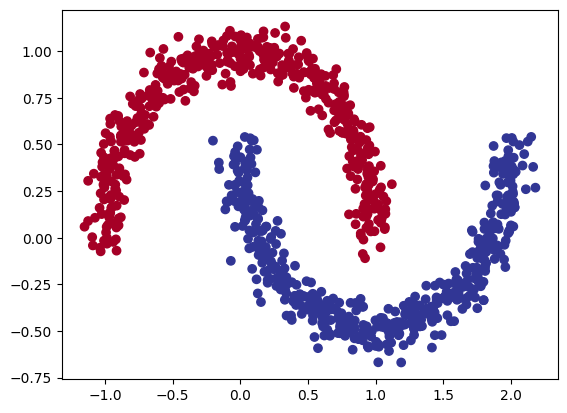

In [5]:
# Visualize the data on a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [6]:
# Turn data into tensors
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

 - Mengubah data menjadi tensors PyTorch untuk digunakan dalam pelatihan model.
   - Melakukan pembagian data menjadi set pelatihan dan pengujian menggunakan `train_test_split`.


## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [7]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()

        self.layer1 = nn.Linear(in_features=in_features,
                                 out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units,
                                 out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units,
                                out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


# Instantiate the model
model_0 = MoonModelV0(in_features=2,
                      out_features=1,
                      hidden_units=10).to(device)
model_0

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


   - Model klasifikasi (MoonModelV0) dibuat dengan menggunakan tiga layer linear (`nn.Linear`) dan fungsi aktivasi ReLU (`nn.ReLU()`).
   - Jumlah fitur masukan (`in_features`) adalah 2, jumlah fitur keluaran (`out_features`) adalah 1, dan jumlah unit tersembunyi (`hidden_units`) adalah 10.

  


In [8]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5620, -0.2743],
                      [-0.6255,  0.3658],
                      [ 0.0630,  0.1600],
                      [-0.3200, -0.4099],
                      [-0.0771, -0.4225],
                      [-0.6933,  0.2338],
                      [ 0.6805, -0.0247],
                      [-0.0592, -0.4428],
                      [-0.2450, -0.3070],
                      [ 0.3540, -0.4186]], device='cuda:0')),
             ('layer1.bias',
              tensor([ 0.2633, -0.0943, -0.1949,  0.3683,  0.5908, -0.0352,  0.5168,  0.2080,
                      -0.6836, -0.2239], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.2825,  0.2061, -0.1775,  0.2300, -0.1274, -0.0882,  0.1026,  0.2249,
                        0.2094, -0.3105],
                      [-0.1654, -0.0598, -0.1187, -0.0413, -0.1995, -0.2440,  0.0151, -0.0591,
                       -0.1390,  0.2738],
                      [-0.2947, -0.2076, 

- Menunjukkan state_dict dari model setelah inisialisasi.
- State_dict adalah kamus (dictionary) yang berisi semua parameter (bobot dan bias) dari model.

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [9]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss() # sigmoid layer built-in


# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of model to optimize
                            lr=0.1) # learning rate

   - Menggunakan fungsi kerugian `BCEWithLogitsLoss`. Fungsi ini sering digunakan untuk tugas klasifikasi biner ketika model memberikan output logits tanpa melalui fungsi aktivasi sigmoid.
   - BCEWithLogitsLoss mencakup operasi sigmoid layer sebagai bagian dari fungsi loss-nya.

   - Menggunakan optimizer Stochastic Gradient Descent (SGD) untuk mengoptimalkan parameter-parameter model (`model_0.parameters()`).
   - Learning rate (`lr`) diatur sebesar 0.1. Learning rate ini mengontrol seberapa besar langkah-langkah optimasi yang diambil pada setiap iterasi.



## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
 Instruksi "Create a training and testing loop to fit the model you created in 2 to the data you created in 1" mengacu pada proses pelatihan dan pengujian model klasifikasi PyTorch yang telah dibuat sebelumnya pada code sebelumnya (MoonModelV0) menggunakan dataset yang telah dibuat sebelumnya (X_train, y_train, X_test, y_test).

**Note:**
- **Forward Pass:** Pada setiap iterasi, model menerima input (`X_train` atau `X_test`) dan menghasilkan prediksi (`y_preds` atau `test_preds`).
- **Loss Computation:** Menghitung loss antara prediksi dan target menggunakan fungsi kerugian (`loss_fn`).
- **Backward Pass:** Melakukan backward pass untuk menghitung gradien loss terhadap parameter-model.
- **Optimization:** Mengoptimalkan parameter-model menggunakan optimizer (`optimizer`).
- **Test Accuracy Evaluation:** Pada fase pengujian, selain menghitung loss, juga dievaluasi akurasi model pada dataset pengujian.

Pastikan bahwa model, loss function, dan optimizer telah diinisialisasi sebelum loop pelatihan dan pengujian dimulai. Juga, pastikan bahwa data telah diubah menjadi tensor PyTorch sebelum digunakan.

In [10]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
print(model_0(X_train.to(device)[:10]).squeeze())

# Prediction probabilities
print("Pred probs:")
print(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze()))

# Prediction probabilities
print("Pred labels:")
print(torch.round(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze())))

Logits:
tensor([-0.2733, -0.0985, -0.0959, -0.0980, -0.2136, -0.0963, -0.2228, -0.1868,
        -0.1500, -0.1139], device='cuda:0', grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([0.4321, 0.4754, 0.4760, 0.4755, 0.4468, 0.4759, 0.4445, 0.4534, 0.4626,
        0.4716], device='cuda:0', grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0',
       grad_fn=<RoundBackward0>)


   - Logits adalah keluaran raw dari model sebelum melewati fungsi aktivasi. Prediksi probabilitas dihitung menggunakan sigmoid activation pada logits.
   - Logits menunjukkan nilai numerik untuk setiap sampel, sedangkan prediksi probabilitas adalah nilai antara 0 dan 1 yang menunjukkan seberapa yakin model bahwa sampel tersebut termasuk dalam kelas positif (1).


In [11]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 6.6 MB/s eta 0:00:00


MulticlassAccuracy()

   - Menggunakan fungsi akurasi dari TorchMetrics untuk mengukur akurasi pada setiap epoch selama pelatihan.
   - Menunjukkan akurasi pada set pelatihan dan pengujian setelah setiap 100 epoch.

   


In [12]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs=1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  # print(y_logits[:5]) # model raw outputs are "logits"
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate the loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int())

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.72 Acc: 0.50 | Test loss: 0.72 Test acc: 0.50
Epoch: 100 | Loss: 0.40 Acc: 0.82 | Test loss: 0.42 Test acc: 0.82
Epoch: 200 | Loss: 0.25 Acc: 0.88 | Test loss: 0.26 Test acc: 0.89
Epoch: 300 | Loss: 0.21 Acc: 0.91 | Test loss: 0.21 Test acc: 0.90
Epoch: 400 | Loss: 0.17 Acc: 0.93 | Test loss: 0.17 Test acc: 0.92
Epoch: 500 | Loss: 0.14 Acc: 0.94 | Test loss: 0.13 Test acc: 0.95
Epoch: 600 | Loss: 0.10 Acc: 0.97 | Test loss: 0.09 Test acc: 0.98
Epoch: 700 | Loss: 0.06 Acc: 0.99 | Test loss: 0.06 Test acc: 0.99
Epoch: 800 | Loss: 0.04 Acc: 1.00 | Test loss: 0.04 Test acc: 1.00
Epoch: 900 | Loss: 0.03 Acc: 1.00 | Test loss: 0.03 Test acc: 1.00


- Fungsi akurasi (`Accuracy`) dari TorchMetrics digunakan untuk mengukur akurasi model.
   - `task="multiclass"` digunakan karena kita memiliki dua kelas dalam tugas klasifikasi biner ini.

   - Dilakukan iterasi pelatihan sebanyak 1000 epoch.
   - Model dipindahkan ke perangkat CUDA/GPU (`device`) dan data juga disesuaikan.
   - Selama setiap epoch, dilakukan forward pass, backward pass, dan optimasi parameter-model.
   - Print hasil loss, akurasi pelatihan, loss pengujian, dan akurasi pengujian setiap 100 epoch.

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [13]:
# Plot the model predictions

import numpy as np

# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

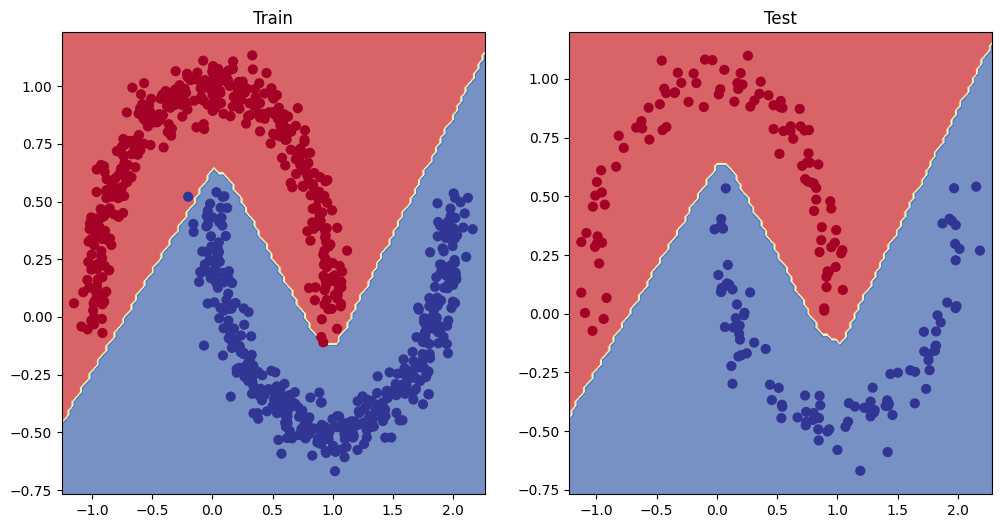

In [14]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

- Plot decision boundary memberikan gambaran visual tentang cara model mengklasifikasikan berbagai wilayah dalam ruang fitur.
- Area diwarnai menunjukkan prediksi model untuk kelas positif atau negatif. Scatter plot menunjukkan titik-titik data dengan warna sesuai dengan label sebenarnya.


## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

Untuk mereplikasi fungsi aktivasi Tanh (hyperbolic tangent) secara murni di PyTorch berarti mengimplementasikan fungsi Tanh tanpa bergantung pada pustaka eksternal atau fungsi PyTorch yang telah ditentukan sebelumnya. Fungsi Tanh didefinisikan sebagai:

\[ \text{Tanh}(x) = \frac{e^{2x} - 1}{e^{2x} + 1} \]

Dalam kode ini, fungsi `tanh_activation` mengambil tensor PyTorch `x` sebagai input dan menerapkan fungsi aktivasi Tanh secara elemen. Fungsi ini menggunakan operasi dasar PyTorch seperti eksponensial dan pembagian untuk mereplikasi fungsi Tanh.

Ini adalah implementasi sederhana, dan dalam praktiknya, Anda biasanya akan menggunakan fungsi bawaan `torch.tanh` untuk efisiensi dan stabilitas numerik. Fungsi bawaan ini dioptimalkan untuk komputasi GPU dan lebih stabil secara numerik, terutama untuk nilai input yang besar.

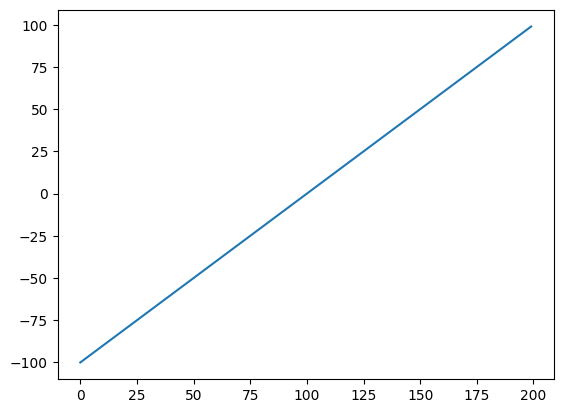

In [15]:
# Create a straight line tensor
tensor_A = torch.arange(-100, 100, 1)
plt.plot(tensor_A)

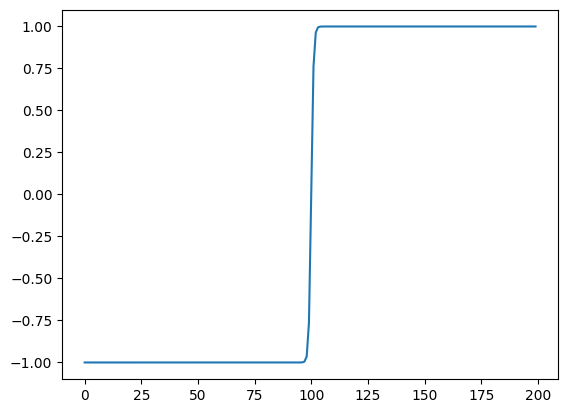

In [16]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(tensor_A))

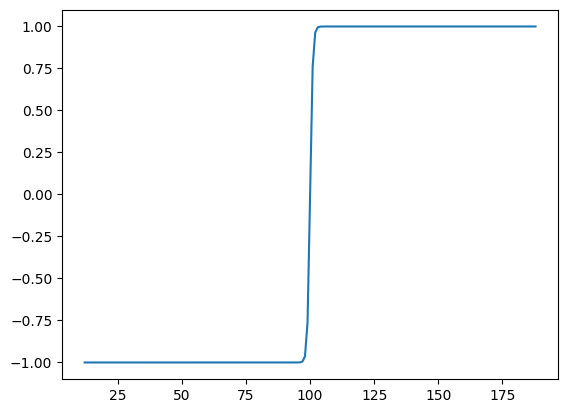

In [17]:
# Replicate torch.tanh() and plot it
def tanh(x):
  # Source - https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.plot(tanh(tensor_A))

- Kode ini digunakan untuk membandingkan hasil fungsi aktivasi Tanh bawaan PyTorch (`torch.tanh()`) dengan replikasi yang diimplementasikan secara manual (`tanh(x)`). Plot yang dihasilkan seharusnya serupa atau identik, menunjukkan bahwa replikasi fungsi berhasil.

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
Materi PyTorch Classification Exercise yang Anda maksud mungkin merujuk pada pembuatan dataset multikelas menggunakan fungsi penciptaan data spirals dari kursus CS231n. Fungsi pembuatan data spirals ini digunakan untuk membuat dataset sintetis yang menggambarkan dua kelas dengan pola spiral. Dataset ini berguna untuk latihan klasifikasi multikelas pada jaringan saraf.

Fungsi `generate_spiral_data` menghasilkan dataset dengan pola spiral yang terdiri dari beberapa kelas. Setiap kelas direpresentasikan oleh garis spiral dalam ruang dua dimensi. Fungsi ini mengembalikan fitur (\(X\)) dan label (\(y\)) dari dataset.

Contoh penggunaan:

```python
num_samples = 100
num_classes = 3
X, y = generate_spiral_data(num_samples, num_classes)
```

Dataset yang dihasilkan dapat digunakan untuk melatih dan menguji model klasifikasi multikelas pada tugas pengenalan pola spiral.

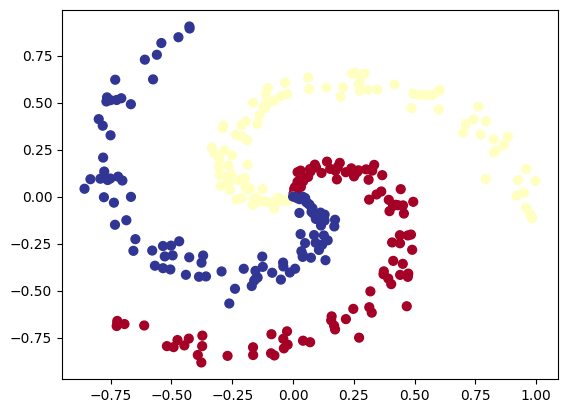

In [18]:
# Code for creating a spiral dataset from CS231n
import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [19]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [20]:
# Let's calculate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [21]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

class SpiralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=2, out_features=10)
    self.linear2 = nn.Linear(in_features=10, out_features=10)
    self.linear3 = nn.Linear(in_features=10, out_features=3)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))

model_1 = SpiralModel().to(device)
model_1


SpiralModel(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [22]:
# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

# Print out untrained model outputs
print("Logits:")
print(model_1(X_train)[:10])

print("Pred probs:")
print(torch.softmax(model_1(X_train)[:10], dim=1))

print("Pred labels:")
print(torch.softmax(model_1(X_train)[:10], dim=1).argmax(dim=1))


torch.float32 torch.float32 torch.int64 torch.int64
Logits:
tensor([[-0.2160, -0.0600,  0.2256],
        [-0.2020, -0.0530,  0.2257],
        [-0.2223, -0.0604,  0.2384],
        [-0.2174, -0.0555,  0.2826],
        [-0.2201, -0.0502,  0.2792],
        [-0.2195, -0.0565,  0.2457],
        [-0.2212, -0.0581,  0.2440],
        [-0.2251, -0.0631,  0.2354],
        [-0.2116, -0.0548,  0.2336],
        [-0.2170, -0.0552,  0.2842]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.2685, 0.3139, 0.4176],
        [0.2707, 0.3142, 0.4151],
        [0.2659, 0.3126, 0.4215],
        [0.2615, 0.3074, 0.4311],
        [0.2609, 0.3092, 0.4299],
        [0.2653, 0.3123, 0.4224],
        [0.2653, 0.3123, 0.4224],
        [0.2659, 0.3127, 0.4214],
        [0.2681, 0.3136, 0.4184],
        [0.2614, 0.3072, 0.4314]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')


In [23]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.02)


In [24]:
# Build a training loop for the model
epochs = 1000

# Loop over data
for epoch in range(epochs):
  ## Training
  model_1.train()
  # 1. forward pass
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backwards
  loss.backward()

  # 5. optimizer step step step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1.12 Acc: 0.32 | Test loss: 1.10 Test acc: 0.37
Epoch: 100 | Loss: 0.45 Acc: 0.78 | Test loss: 0.53 Test acc: 0.68
Epoch: 200 | Loss: 0.12 Acc: 0.96 | Test loss: 0.09 Test acc: 0.98
Epoch: 300 | Loss: 0.07 Acc: 0.98 | Test loss: 0.02 Test acc: 1.00
Epoch: 400 | Loss: 0.05 Acc: 0.98 | Test loss: 0.01 Test acc: 1.00
Epoch: 500 | Loss: 0.04 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00
Epoch: 600 | Loss: 0.03 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00
Epoch: 700 | Loss: 0.03 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 800 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 900 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00


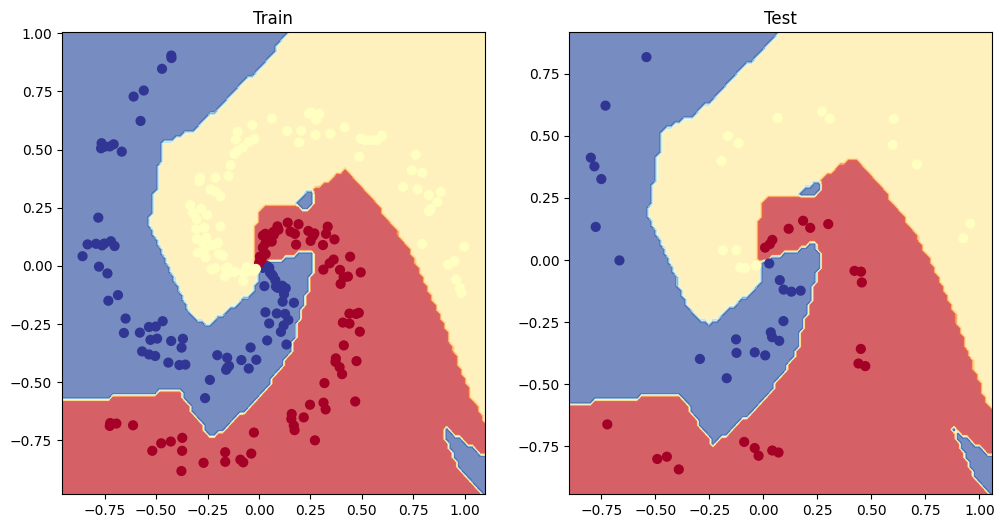

In [25]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

- Penggunaan GPU (cuda) akan mempercepat pelatihan model.
- Hasil pelatihan dapat bervariasi tergantung pada inisialisasi acak dan parameter pelatihan.
